In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.manifold import TSNE
import time
from mpl_toolkits import mplot3d 
from google.colab.patches import cv2_imshow


# **Answer to Question 1(a)**

In [ ]:
S =loadmat('/content/drive/My Drive/ML(PG)_assignment_1/dataset_1.mat')
#print(S)

In [ ]:
samplearr=S['samples'].reshape(-1,784)
data1=pd.DataFrame(samplearr)
labels=S['labels'].reshape(-1)
data1['labels']=labels
print(data1)

         0    1    2    3    4    5    6  ...  778  779  780  781  782  783  labels
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       5
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       4
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       1
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       9
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...
49995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       5
49996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       0
49997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       8
49998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       4
49999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0 

<Figure size 720x720 with 0 Axes>

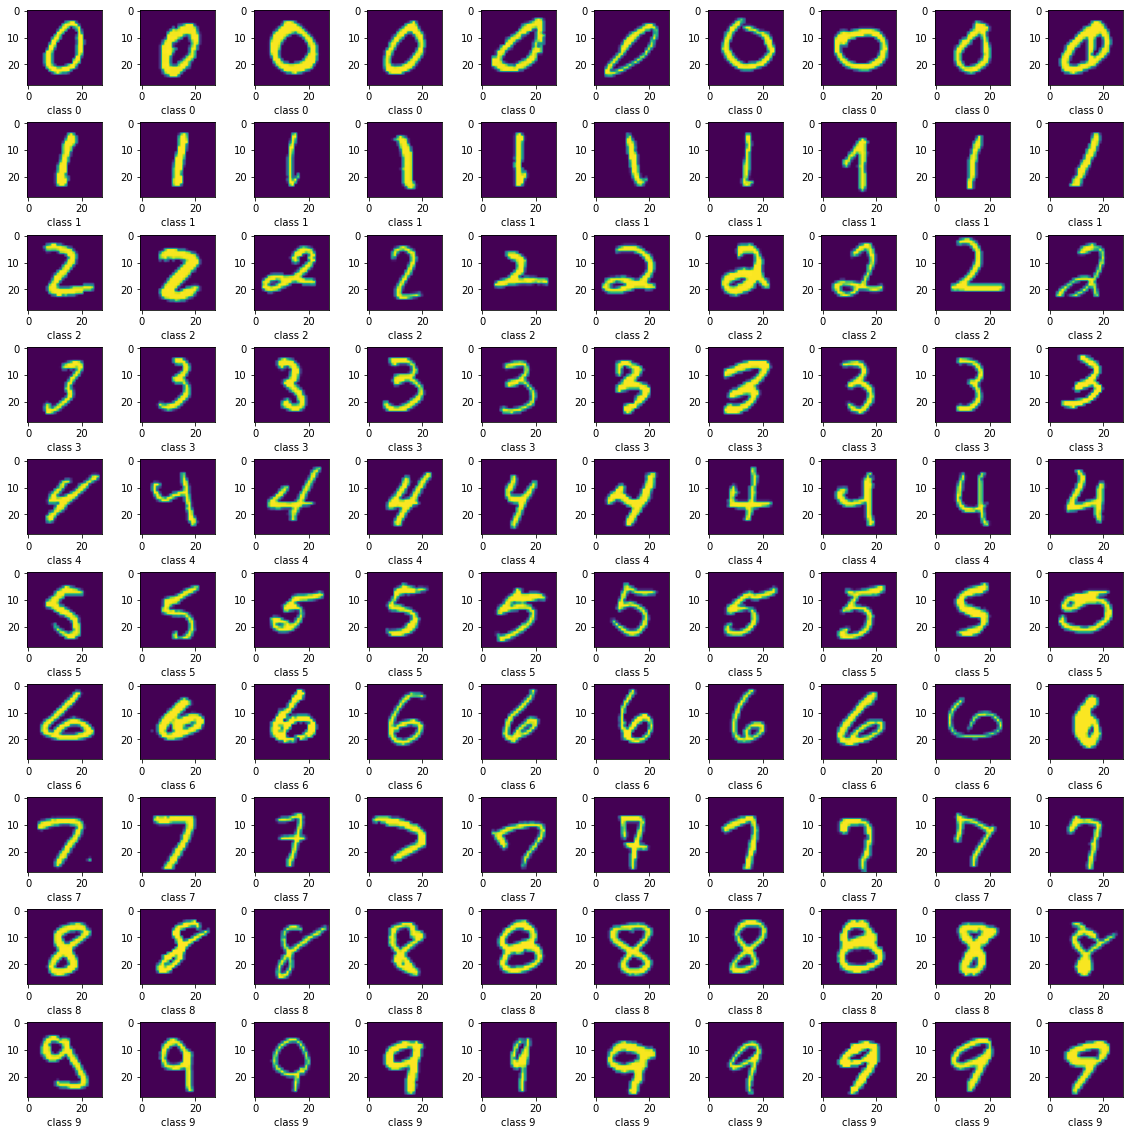

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(10, 10,figsize=(20,20))
fig.subplots_adjust(hspace=0.5)
for j in range(10): 
   newdf = data1[data1['labels']==j]
   newdf = newdf.iloc[:, :784]
   arr = np.array(newdf.sample(n=10))
   arr2 = np.reshape(arr[j], (28, 28))
   for k in range(10):
     arr = np.array(newdf.sample(n=10))
     arr2 = np.reshape(arr[j], (28, 28))
     ax[j,k].imshow(arr2) #row=0, col=0
     ax[j,k].set_xlabel("class {}".format(j))   
plt.show()

# **Answer to Question 1(b)**

In [ ]:
 #/content/drive/My Drive/ML(PG)_assignment_1/dataset_2.mat
D = loadmat('/content/drive/My Drive/ML(PG)_assignment_1/dataset_2.mat')
print(D)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Sep 12 18:52:19 2020', '__version__': '1.0', '__globals__': [], 'samples': array([[-3.74203958, -3.04465737],
       [ 4.60871196,  7.01765941],
       [ 5.31135551,  0.97011991],
       ...,
       [ 5.17666258,  5.10746383],
       [ 6.66563706,  5.465137  ],
       [ 7.86690019,  4.4964122 ]]), 'labels': array([[0, 3, 2, ..., 3, 3, 3]])}


In [ ]:
# samplearr=S['samples'].reshape(-1,784)
# data1=pd.DataFrame(samplearr)
# labels=S['labels'].reshape(-1)
# data1['labels']=labels
# print(data1)
samplesarr2 = D['samples']
data2 = pd.DataFrame(samplesarr2, columns=['a','b'])
labels2 = D['labels'].reshape(-1)
data2['labels'] = labels2
print(data2)

              a         b  labels
0     -3.742040 -3.044657       0
1      4.608712  7.017659       3
2      5.311356  0.970120       2
3      4.881857  5.295445       3
4     -4.517404 -1.755663       0
...         ...       ...     ...
19995  5.052006  1.276917       2
19996  4.035034  6.306404       3
19997  5.176663  5.107464       3
19998  6.665637  5.465137       3
19999  7.866900  4.496412       3

[20000 rows x 3 columns]


In [ ]:
classes=list(data2['labels'].unique())
classes.sort()
print(classes)
classes= [str(i) for i in classes]
print(classes)

[0, 1, 2, 3]
['0', '1', '2', '3']


In [ ]:
x=np.array(data2['a'])
y=np.array(data2['b'])
z=np.array(data2['labels'])

In [ ]:
x,y,z

(array([-3.74203958,  4.60871196,  5.31135551, ...,  5.17666258,
         6.66563706,  7.86690019]),
 array([-3.04465737,  7.01765941,  0.97011991, ...,  5.10746383,
         5.465137  ,  4.4964122 ]),
 array([0, 3, 2, ..., 3, 3, 3]))

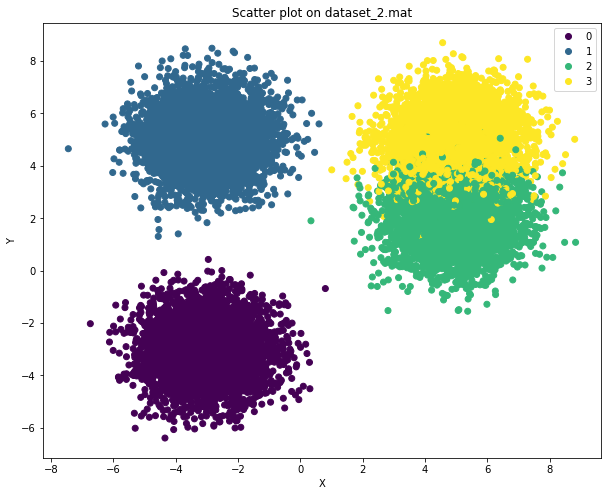

In [ ]:
plt.figure(figsize=(10,8))
sc_plot=plt.scatter(x,y,c=z)
plt.title("Scatter plot on dataset_2.mat")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(handles=sc_plot.legend_elements()[0],labels=classes)
plt.show()
#handles=sc_plot.legend_elements()[0],labels=classes

# **Answer to Question 1(c)** 

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(data1.iloc[:,:-1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 11.916s...
[t-SNE] Computed neighbors for 50000 samples in 4223.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities fo

In [ ]:
tsne_df=pd.DataFrame(tsne_results,columns=['a','b'])
labels=data1['labels']
tsne_df['labels']=labels

In [ ]:
#np.array(tsne_df['labels'].unique())
classes2=list(tsne_df['labels'].unique())
classes2.sort()
print(classes2)
classes2= [str(i) for i in classes2]
print(classes2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


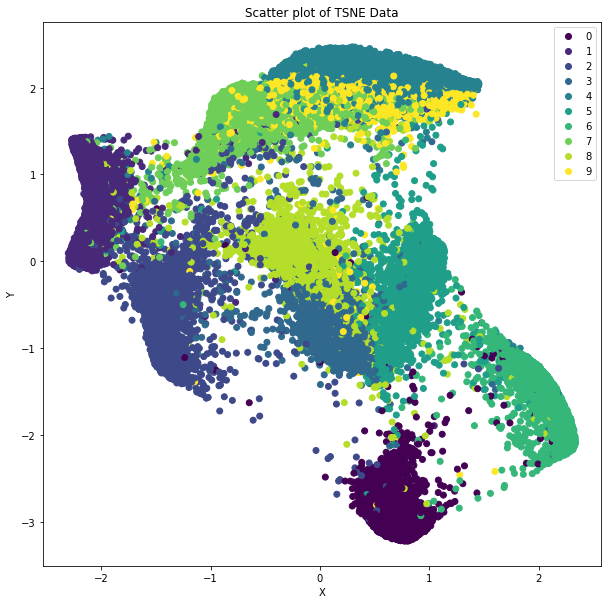

In [ ]:
#do it the same way as the graph just above tsne
#classes2 = np.array(tsne_df['labels'].unique().sort())
fig=plt.figure(figsize=(10,10))
sc_plt2=plt.scatter(np.array(tsne_df['a']),np.array(tsne_df['b']),marker='o',c=np.array(tsne_df['labels']))
plt.title('Scatter plot of TSNE Data')
plt.legend(handles = sc_plt2.legend_elements()[0],labels = classes2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# **Answer to Question 1(d)**

In [ ]:
#3d plot
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=250)
tsne_results = tsne.fit_transform(data1.iloc[:,:-1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 22.218s...
[t-SNE] Computed neighbors for 50000 samples in 4272.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for

In [ ]:
tsne_df=pd.DataFrame(tsne_results,columns=['a','b','c'])
labels=S['labels'][0].reshape(-1)
tsne_df['labels']=labels

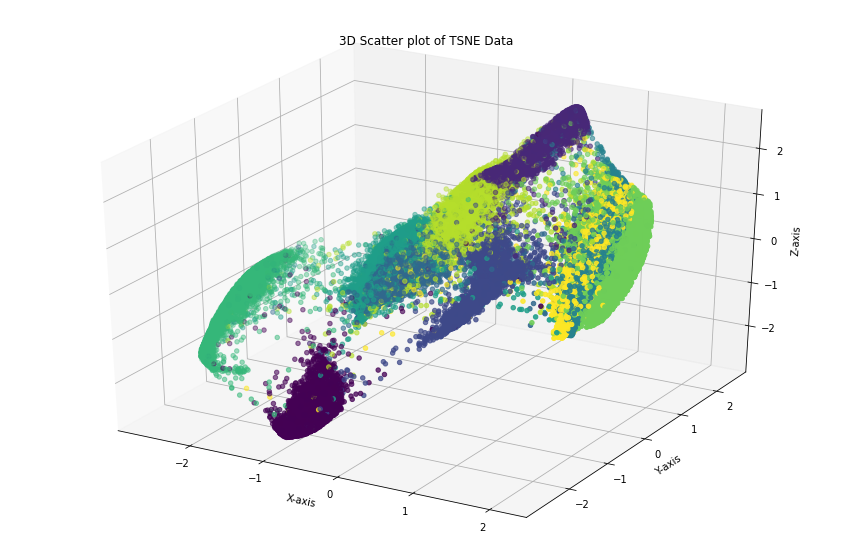

In [ ]:
x = np.array(tsne_df['a'])
y = np.array(tsne_df['c'])
z = np.array(tsne_df['c'])
fig=plt.figure(figsize=(15,10))
ax = plt.axes(projection ="3d") 
ax.scatter3D(x, y, z, c = np.array(tsne_df['labels']))
plt.title('3D Scatter plot of TSNE Data')
ax.set_xlabel('X-axis')  
ax.set_ylabel('Y-axis')  
ax.set_zlabel('Z-axis') 
plt.show()